In [28]:
import regex as re

ls = open("1").read().split("\n")
def cal1(l):
    xs = re.findall(r"\d", l)
    return int("".join(xs[0] + xs[-1]))

ll = {
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9
}
def cal2(l):
    xs = re.findall(r"\d|(one)|(two)|(three)|(four)|(five)|(six)|(seven)|(eight)|(nine)".replace(")", "").replace("(", ""),
                    l, overlapped=True)
    xs = [int(x) if x.isdigit() else ll[x] for x in xs]
    return 10*xs[0] + xs[-1]
    
sum([*map(cal1, ls)]), sum([*map(cal2, ls)])

(54331, 54518)

In [55]:
from functools import reduce

prod = lambda ls: reduce(lambda x,y: x*y, ls)

ls = open("2").read().split("\n")
def parse(l):
    rs = l.split(":")[1].split(";")
    rs = [r.split(",") for r in rs]
    rs = [[x.strip().split(" ") for x in r] for r in rs]
    rs = [dict([(y,int(x)) for x,y in r]) for r in rs]
    return rs

init = {"red": 12, "green": 13, "blue": 14}
def isposs(rs):
    return all(all(init[c] >= i for c,i in r.items()) for r in rs)
def power(g):
    return prod(max(r[c] if c in r else 0 for r in g) for c in init.keys())

games = [*map(parse,ls)]
sum(i+1 for i,g in enumerate(games) if isposs(g)), sum(map(power, games))

(2207, 62241)

In [111]:
import re
from itertools import product

ls = """467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598..""".split("\n")
ls = [*open("3")]
def adjacent(n):
    (y,x),s = n
    r = []
    for i in range(len(s)):
        for dy,dx in product((-1,0,1), repeat=2):
            #print((y+dy, x+i+dx))
            if (y+dy, x+i+dx) in alls: r.append((y+dy, x+i+dx))
    return set(r)

is_part = lambda n: len(adjacent(n)) != 0
gear_ratio = lambda s: [int(nums[i][1]) for i,a in enumerate(adj) if s in a]

allss = [((y,x),c) for y,l in enumerate(ls) for x,c in enumerate(l) if c not in "1234567890."]
alls = [x for x,y in allss]
p = re.compile(r"\d+")
nums = [((y,m.start()), m.group()) for y,l in enumerate(ls) for m in p.finditer(l)]
adj = [*map(adjacent, nums)]
parts = [*filter(is_part, nums)]
stars = [x for x,y in allss if y == "*"]

sum([int(y) for x,y in parts]), sum([prod(xs) for xs in map(gear_ratio, stars) if len(xs) == 2])

(536202, 78272573)

In [8]:
import re

ls = """Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11""".split("\n")
ls = [*open("4")]
def parse(l):
    x,y = l.split(": ")[1].split("|")
    return [*map(int, re.findall("\d+", x))], [*map(int, re.findall("\d+", y))]
def nmatch(ns):
    x,y = ns
    return len(set(x) & set(y))
def score(ns):
    s = nmatch(ns)
    return 0 if s == 0 else 2**(s-1)
def next_cards(i):
    return [*range(i+1, i+1+nmatch(ns[i]))]

ns = [*map(parse, ls)]
toproc = {i:1 for i in range(len(ns))}
curr = toproc.copy()
while len(toproc):
    ntoproc = {}
    for idd,num in toproc.items():
        nc = next_cards(idd)
        for n in nc:
            if n not in curr: curr[n] = 0
            if n not in ntoproc: ntoproc[n] = 0
            curr[n] += num
            ntoproc[n] += num
    toproc = ntoproc
    
sum(map(score, ns)), sum([y for x,y in curr.items()])

(21485, 11024379)

In [7]:
sum([y for x,y in curr.items()])

30

In [145]:
ls = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4""".split("\n\n")
ls = open("5").read().split("\n\n")
from functools import reduce

seeds = [*map(int, ls[0].split(": ")[1].strip().split(" "))]
maps = [sorted([[*map(int, x.strip().split(" "))] for x in l.split("\n")[1:]], key=lambda x: x[1]) for l in ls[1:]]

seedr1 = [[i,1] for i in seeds]
seedr2 = [seeds[2*i:2*i+2] for i in range(len(seeds)//2)]

def map_ran(ran, ms):
    rs,rl = ran; nr = []
    for m in ms:
        if rl <= 0: break
        ds,ss,l = m
        # intervals miss entirely
        if ss+l < rs: continue
        if rs+rl < ss: break
        # ran:     |--------|
        # map: |-----|
        if ss <= rs and ss+l <= rs+rl:
            x = ss+l-rs
            nr.append([ds+(rs-ss), x])
            rl -= x; rs = ss+l
        # ran: |----------|
        # map:   |-----|
        if rs < ss and rs+rl > ss+l:
            x = ss-1-rs
            nr.extend([[rs, x], [ds, l]])
            rl -= x + l; rs = ss+l
        # ran:   |-----|
        # map: |---------|
        if rs >= ss and rs+rl <= ss+l:
            nr.append([ds+(rs-ss), rl])
            rl = 0
            break
        # ran: |-----|
        # map:    |---------|
        if rs < ss and rs+rl <= ss+l:
            nr.extend([[rs, ss-rs], [ds, rs+rl-ss]])
            rl = 0
            break
        
    if rl > 0: nr.append([rs, rl])
    return nr
        
def map_rans(rans, ms):
    return sum([map_ran(r, ms) for r in rans], start=[])

min([x for x,y in reduce(map_rans, maps, seedr1)]), min([x for x,y in reduce(map_rans, maps, seedr2)])

(318728750, 37384986)

In [221]:
ls = """Time:      7  15   30
Distance:  9  40  200""".split("\n")
ls = [*open("6")]

import re
from functools import reduce
from math import sqrt, floor, ceil
races1 = [*zip(*(map(int, re.findall(r"\d+", l)) for l in ls))]

prod = lambda xs: reduce(lambda x,y:x*y, xs)
def ans(r):
    T,D = r
    d1 = (T + sqrt(T*T - 4*D)) / 2 - .0001
    d2 = (T - sqrt(T*T - 4*D)) / 2 + .0001
    return floor(d1) - floor(d2)

races2 = [*zip(*(map(int, re.findall(r"\d+", l.replace(" ", ""))) for l in ls))]
prod(map(ans, races1)), prod(map(ans, races2))

(2374848, 39132886)

In [269]:
ls = """32T3K 765
T55J5 684
KK677 28
KTJJT 220
QQQJA 483""".split("\n")
ls = [*open("7")]

from collections import Counter
from itertools import product
_card2n = {c:i for i,c in enumerate("AKQT98765432J")}
card2n = lambda c: _card2n[c]
def get_type(hand):
    hs = sorted(Counter(hand).values())
    if hs == [5]: return 0
    if hs == [1,4]: return 1
    if hs == [2,3]: return 2
    if hs == [1,1,3]: return 3
    if hs == [1,2,2]: return 4
    if hs == [1,1,1,2]: return 5
    return 6
hand2n = lambda h: (get_type(h), *map(card2n, h))

def hand2n2(h):
    jidx = [i for i,s in enumerate(h) if s == "J"]
    x = (*map(card2n, h),)
    m,nh = (get_type(h), *x), h.copy()
    for js in product("AKQT98765432J", repeat=len(jidx)):
        for a,b in zip(jidx, js): nh[a] = b
        mm = (get_type(nh), *x)
        if mm < m: m = mm
    return m
    
hand_bids = [([*x],int(y)) for x,y in [i.split(" ") for i in ls]]
hand_bids = sorted(hand_bids, key=lambda x: hand2n(x[0]), reverse=True)
hand_bids2 = sorted(hand_bids, key=lambda x: hand2n2(x[0]), reverse=True)
sum([(i+1)*s for i,(_,s) in enumerate(hand_bids)]), sum([(i+1)*s for i,(_,s) in enumerate(hand_bids2)])

(248761814, 249631254)

In [328]:
ls = """LLR

AAA = (BBB, BBB)
BBB = (AAA, ZZZ)
ZZZ = (ZZZ, ZZZ)""".split("\n")
ls = [*open("8")]
import re
from functools import reduce
from math import gcd
lcm = lambda x,y: x*y // gcd(x,y)
path = ["LR".index(x) for x in ls[0].strip()]
nodes = {x: (y,z) for x,y,z in (re.findall(r"[A-Z1-9]+", l) for l in ls[2:])}

def nsteps(start, end_cond):
    npt, n = 0, start
    while True:
        for p in path:
            n = nodes[n][p]; npt += 1
            if end_cond(n): return npt

starts = [*filter(lambda x: x[2] == "A", nodes.keys())]
cycles = [nsteps(s, lambda x: x[2] == "Z") for s in starts]
nsteps("AAA", lambda x: x == "ZZZ"), reduce(lcm, cycles)

(14681, 14321394058031)

In [445]:
ls = """0 3 6 9 12 15
1 3 6 10 15 21
10 13 16 21 30 45""".split("\n")
ls = [*open("9")]

import re
data = [[*map(int, l.split(" "))]for l in ls]
diff = lambda xs: [xs[i+1] - xs[i] for i in range(len(xs)-1)]

def extrapolate(dd):
    ds = [dd]
    while True:
        x = diff(ds[-1])
        if set(x) == {0}: return sum(x[-1] for x in ds), sum([1,-1][i&1]*x[0] for i,x in enumerate(ds))
        ds.append(x)
    
[*map(sum, zip(*map(extrapolate, data)))]

[1877825184, 1108]

In [70]:
ls = """.F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ...""".split("\n")
ls = [*open("10")]
from itertools import product
import sys
sys.setrecursionlimit(1000000)

sy,sx = len(ls), len(ls[0])
start = [(y,x) for y,l in enumerate(ls) for x,c in enumerate(l) if c == "S"][0]
expect = {
    (-1,0): {"|": (-2,0), "7": (-1,-1), "F": (-1,1)},
    (1 ,0): {"|": (2 ,0), "L": (1 , 1), "J": (1,-1)},
    (0,-1): {"-": (0,-2), "L": (-1,-1), "F": (1,-1)},
    (0, 1): {"-": (0, 2), "7": ( 1, 1), "J": (-1,1)}
}

def getcycle(start):
    path = [start]
    py,px = start
    for dy,dx in [(-1,0), (1,0), (0,-1), (0,1)]:
        if (c:=ls[py+dy][px+dx]) in (k := expect[(dy,dx)]).keys():
            ldy,ldx = k[c]
            lpy=py+ldy; lpx=px+ldx
            py+=dy; px+=dx
            path.append((py,px))
            break
    while (lpy,lpx) != start:
        d = lpy-py,lpx-px
        npy,npx = lpy,lpx
        ldy,ldx = expect[d][ls[npy][npx]]
        path.append((npy,npx))
        lpy = py+ldy; lpx = px+ldx
        py,px = npy,npx
    return path

path = getcycle(start)

import numpy as np
def enclosed(cycle, pos, marked):
    if marked[pos] == 1 or pos in cycle: return
    marked[pos] = 1
    py,px = pos
    for dy,dx in [(-1,0), (1,0), (0,-1), (0,1)]:
        npy = py+dy; npx = px+dx
        if npy < 0 or npy >= 2*sy or npx < 0 or npx >= 2*sx: continue
        enclosed(cycle, (npy,npx), marked)
        
path2, _path2 = [], [(x*2,y*2) for x,y in path]
for i,(x,y) in enumerate(_path2):
    a,b = _path2[i-1]
    path2.extend([((a+x)//2, (b+y)//2), (x,y)])
    
marked = np.zeros((sy*2,sx*2), dtype=np.uint8)
for y,x in product(range(sy), range(sx)):
    if (y > 0 and y < sy-1) or (x > 0 and x < sx-1): continue
    enclosed(path2, (2*y+1,2*x+1), marked)
for p in path2: marked[p] = 1
len(path)//2, len([None for y,x in product(range(sy), range(sx)) if marked[2*y:2*y+2, 2*x:2*x+2].max() == 0])

(7173, 291)

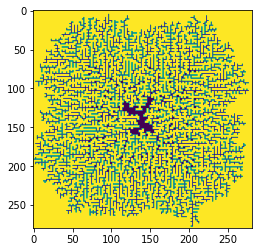

In [68]:
import matplotlib.pyplot as plt
plt.imshow(marked)

In [2]:
ls = """...#......
.......#..
#.........
..........
......#...
.#........
.........#
..........
.......#..
#...#.....""".split("\n")
ls = [*open("11")]
import numpy as np
from itertools import combinations_with_replacement
uni = np.array([[".#".index(c) for c in l.strip()] for l in ls], dtype=np.uint64)

def ans(scale):
    dist = np.ones((len(uni), len(uni[0])), dtype=np.uint64)
    dist[:,np.where(uni.sum(axis=0) == 0)] = scale
    dist[np.where(uni.sum(axis=1) == 0),:] = scale
    def distance(p1,p2):
        y,x = p1; b,a = p2
        i,j = sorted([y,b]); k,l = sorted([x,a])
        return int(dist[i:j,x].sum()) + int(dist[y,k:l].sum())
    galaxies = [*zip(*np.where(uni == 1))]
    return sum(distance(p1,p2) for p1,p2 in combinations_with_replacement(galaxies, 2))

ans(2), ans(1000000)

(9681886, 791134099634)

In [2]:
ls = """???.### 1,1,3
.??..??...?##. 1,1,3
?#?#?#?#?#?#?#? 1,3,1,6
????.#...#... 4,1,1
????.######..#####. 1,6,5
?###???????? 3,2,1""".split("\n")
ls = [*open("12")]
import re
from tqdm import tqdm
from functools import lru_cache
games = [(x, (*map(int, y.split(",")),)) for x,y in (l.strip().split(" ") for l in ls)]
games2 = [("?".join([x]*5), y*5) for x,y in games]

@lru_cache(maxsize=None)
def count_poss(g):
    pos, hints = g
    if "?" not in pos:
        l = [*map(len, re.findall(r"#+", pos))]
        return len(l) == len(hints) and int(all(x==y for x,y in zip(l, hints)))
    i,p = pos.index("?"), re.compile(r"#+\.")
    y = [(m.start(), m.end()) for m in p.finditer(pos[:i+1])]
    x = [y-x-1 for x,y in y]
    if len(hints) < len(x) or any(x!=y for x,y in zip(x,hints)): return 0
    j,nh = 0 if len(y) == 0 else y[-1][1], hints[len(x):]
    return sum(count_poss(((pos[j:i]+x+pos[i+1:]).strip("."), nh)) for x in ".#")
    
[sum(map(count_poss, gs)) for gs in [games, tqdm(games2)]]

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.23it/s]


[7118, 7030194981795]